From a global view, Age and Hours per week are the two most important features, with Education-Num, Country, Occupation, Capital Loss, Workclass and Relationship following behind. The rest is of no importance to distinguish instances classified $(False, True)$. The first two rules explain 8 of the 14 instances classified differently. From them I can reason that differences are most likely:
- Age: 28-43
- Education-Num: ≥11
- Relationship: ≥4
- Hours per week: 40-42

But with some local exceptions, as explained by the other six rules, which cover a single instance classified differently each.
- rule 3 (node 31): adds country ≤ 4
- rule 4 (node 20): adds Education-Num ≤ 10, Capital Loss 2015-2100
- rule 5 (node 16): higher Age (48-52), adds Education-Num $= 10$, Capital Loss $\leq 2014$, Occupation $>10$
- rule 6 (node 11): higher Age (47), lower Education-Num (10), adds Capital Loss $\leq 2014$, Occupation $\geq 3$
- rule 7 (node 41): broader Age range (31-43), 

TODO it's hard to make any sense of these many terms

Evaluation:
- A tree of depth 9 with 49 nodes is needed to explain all instances classified differently. Considering, that usually a decision tree with a depth of up to 3 is considered interpretable, this is a lot. On a large screen, it's still possible to visualize the tree structure.
- From the tree, 8 rules can be extracted, with a total of 52 terms (6.5 avg. per rule). The first rule is the most important one, it covers 5 of the 14 instances classified differently. The second rule explains 3 instances while the other rules just one.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from comparers import ModelComparer
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from baseline import print_rules
from util import CombinationClassifier
from tasks.adult import make_task_with_influential_modification as make_task

In [2]:
clf_a, clf_b, X, X_display, y, feature_names = make_task()

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[09:45:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "nestimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:45:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:45:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "nestimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above c

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

In [4]:
mclass_diff = comparer.predict_mclass_diff(X)

## $(False,True)$

In [5]:
focus_class = '(False, True)'

In [6]:
class_names = np.array(['other', focus_class])

In [7]:
def explain(max_depth=None, tree_fig_size=(14, 14)):
    global tree
    clf = CombinationClassifier(comparer, focus_class)
    y_pred = clf.predict(X)
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X, y_pred)
    
    feature_importances = tree.feature_importances_
    feature_order = np.flip(np.argsort(feature_importances))
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.set_title('Relative feature importance')
    ax.scatter(feature_importances[np.flip(feature_order)],
               comparer.feature_names[np.flip(feature_order)])
    plt.show()
    
    fig, ax = plt.subplots(figsize=tree_fig_size)
    plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, node_ids=True, precision=2)
    
    y_test = mclass_diff == np.where(comparer.class_names == focus_class)[0][0]
    print_rules(tree, feature_names, class_names, focus_class, X_test=X, y_test=y_test, precision=2, feature_order=None)

    print(classification_report(y_test, tree.predict(X), target_names=class_names))

This explanation fails to describe the differences.

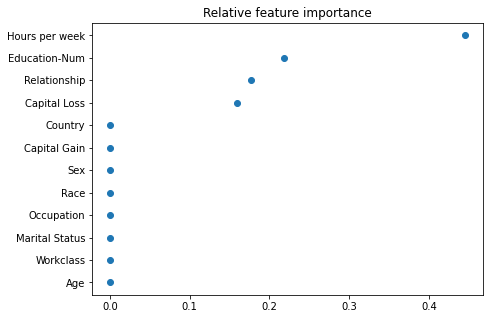

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


               precision    recall  f1-score   support

        other       0.99      1.00      0.99       963
(False, True)       0.00      0.00      0.00        14

     accuracy                           0.99       977
    macro avg       0.49      0.50      0.50       977
 weighted avg       0.97      0.99      0.98       977



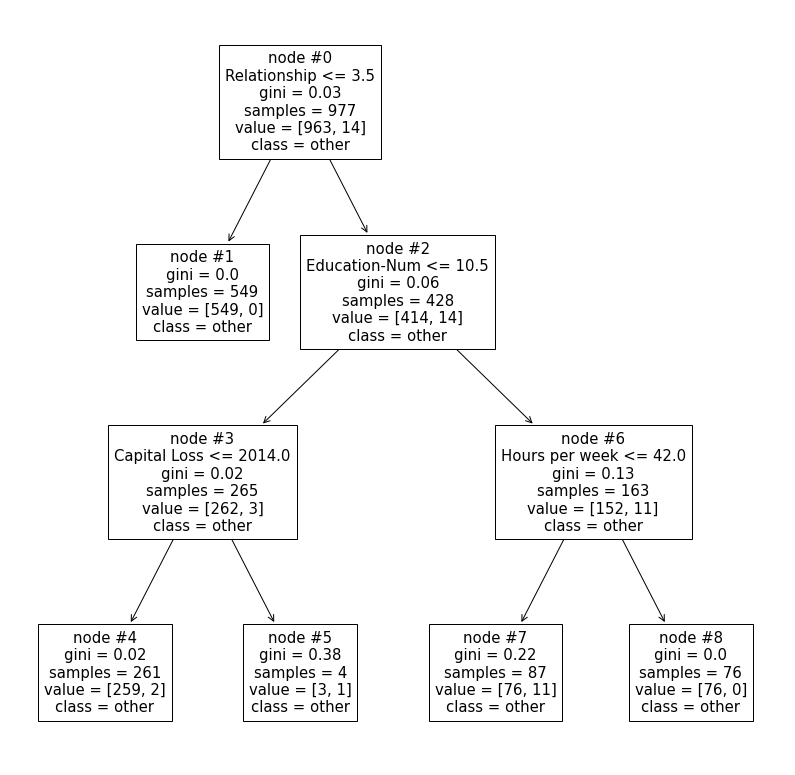

In [8]:
explain(max_depth=3)

This explanation only covers a single instance, therefore I skip it.

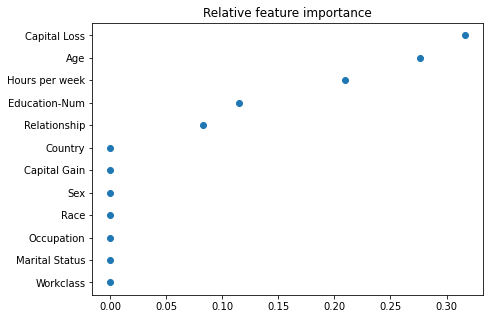

node #8: if (Education-Num <= 10.5) and (Relationship > 3.5) and (Capital Loss > 2014.0) and (Capital Loss <= 2100.0) then class (False, True) (covers 1.0 of 1 instances)
number of rules: 1
number of terms: 4 (4.0 avg. per rule)
               precision    recall  f1-score   support

        other       0.99      1.00      0.99       963
(False, True)       1.00      0.07      0.13        14

     accuracy                           0.99       977
    macro avg       0.99      0.54      0.56       977
 weighted avg       0.99      0.99      0.98       977



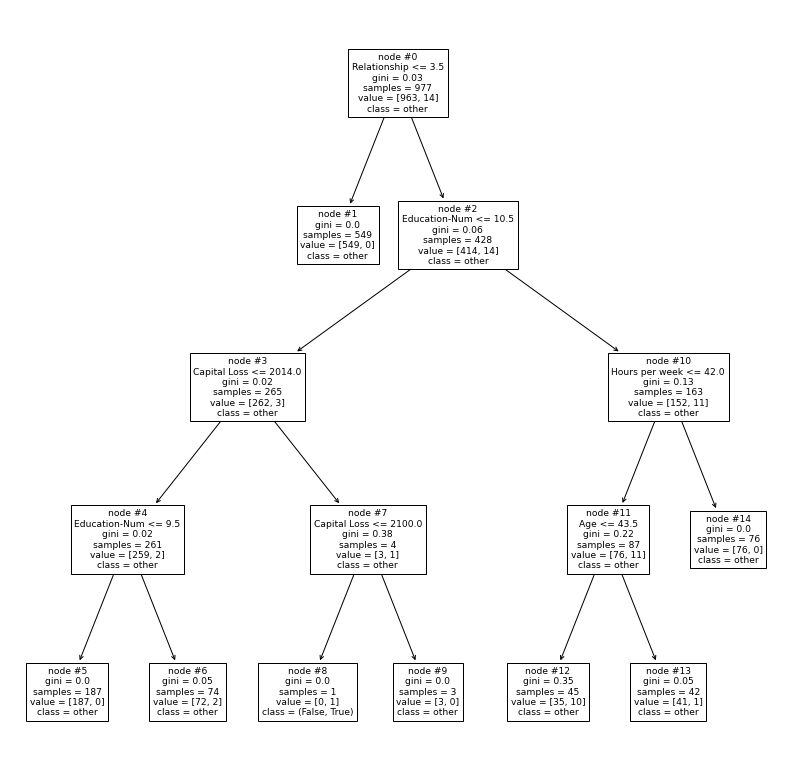

In [9]:
explain(max_depth=4)

Same here.

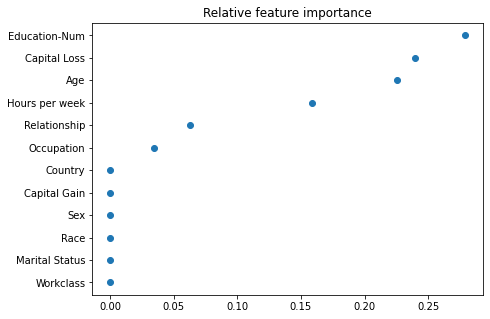

node #10: if (Education-Num <= 10.5) and (Relationship > 3.5) and (Capital Loss > 2014.0) and (Capital Loss <= 2100.0) then class (False, True) (covers 1.0 of 1 instances)
number of rules: 1
number of terms: 4 (4.0 avg. per rule)
               precision    recall  f1-score   support

        other       0.99      1.00      0.99       963
(False, True)       1.00      0.07      0.13        14

     accuracy                           0.99       977
    macro avg       0.99      0.54      0.56       977
 weighted avg       0.99      0.99      0.98       977



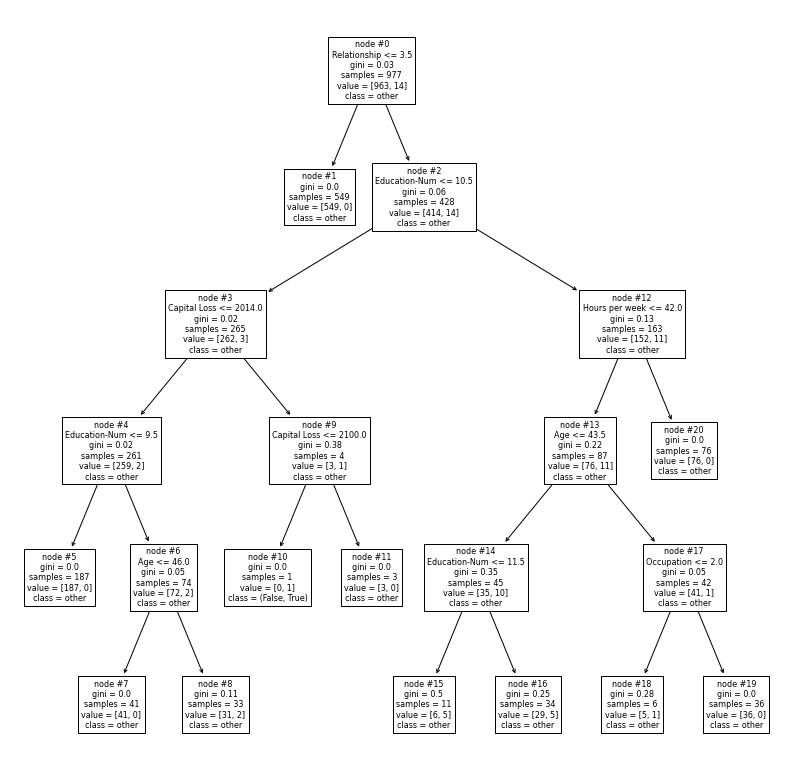

In [10]:
explain(max_depth=5)

The first rule now covers 6 instances, with 3 additional rules that cover 1 instance each.
- rules 1 to 3 discriminate different Age groups and require less than or equal to 42 Hours per week
- all rules discriminate on Education-Num
- all rules require relationship $\geq 4$
- rule 4 discriminates on a high capital loss value

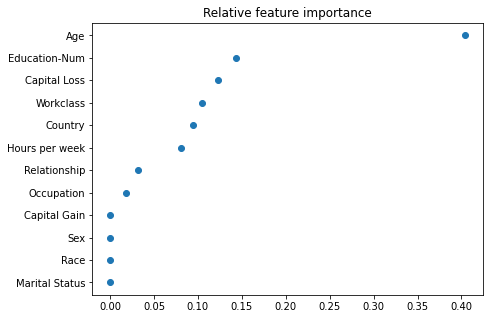

node #19: if (Age > 33.0) and (Age <= 43.5) and (Education-Num > 10.5) and (Education-Num <= 11.5) and (Relationship > 3.5) and (Hours per week <= 42.0) then class (False, True) (covers 0.833 of 6 instances)
node #26: if (Age > 43.5) and (Workclass > 3.0) and (Education-Num > 10.5) and (Occupation <= 2.0) and (Relationship > 3.5) and (Hours per week <= 42.0) then class (False, True) (covers 1.0 of 1 instances)
node #21: if (Age <= 43.5) and (Education-Num > 11.5) and (Relationship > 3.5) and (Hours per week <= 42.0) and (Country <= 4.5) then class (False, True) (covers 1.0 of 1 instances)
node #12: if (Education-Num <= 10.5) and (Relationship > 3.5) and (Capital Loss > 2014.0) and (Capital Loss <= 2100.0) then class (False, True) (covers 1.0 of 1 instances)
number of rules: 4
number of terms: 21 (5.2 avg. per rule)
               precision    recall  f1-score   support

        other       0.99      1.00      1.00       963
(False, True)       0.89      0.57      0.70        14

     a

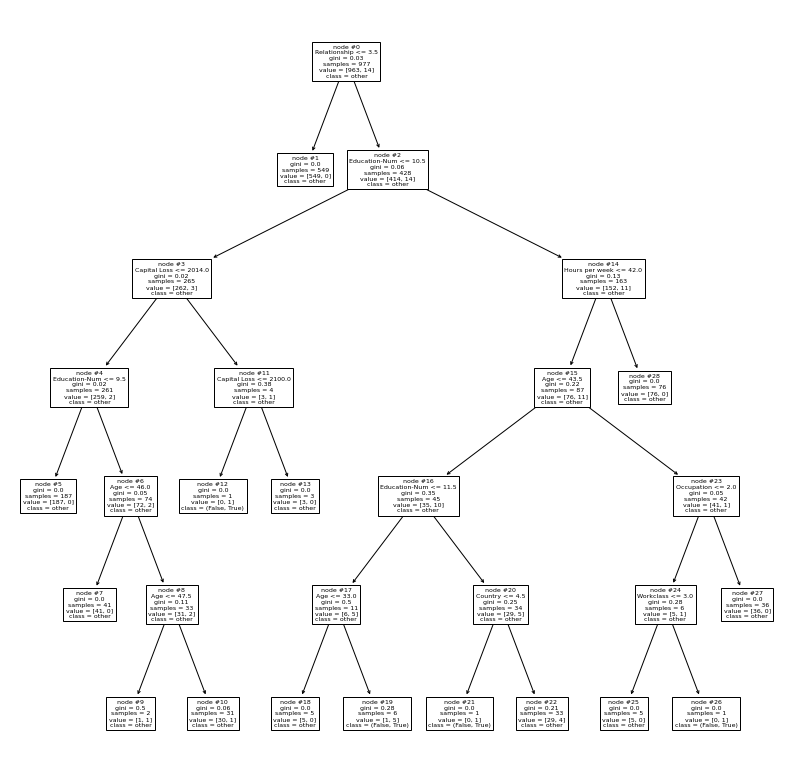

In [11]:
explain(max_depth=6)

rule 1 now targets differences more precisely than in the last explanation, but by using one additional term. There is one additional rule that describes a single instance. This increases the difference class's Precision to 100\% and Recall to 64\%.
- rule 1: additional term is Hours per week $> 39$
- rule 5: Is similar to the first three rules, but additionally discriminates on Workclass and Occupation

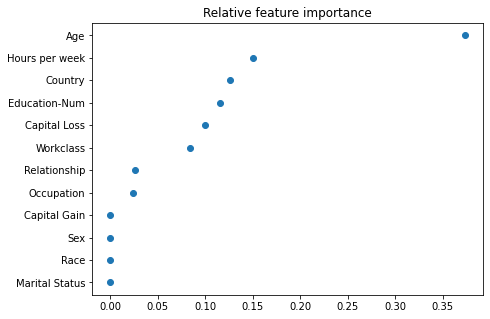

node #25: if (Age > 33.0) and (Age <= 43.5) and (Education-Num > 10.5) and (Education-Num <= 11.5) and (Relationship > 3.5) and (Hours per week > 39.0) and (Hours per week <= 42.0) then class (False, True) (covers 1.0 of 5 instances)
node #27: if (Age <= 43.5) and (Education-Num > 11.5) and (Relationship > 3.5) and (Hours per week <= 42.0) and (Country <= 4.5) then class (False, True) (covers 1.0 of 1 instances)
node #16: if (Education-Num <= 10.5) and (Relationship > 3.5) and (Capital Loss > 2014.0) and (Capital Loss <= 2100.0) then class (False, True) (covers 1.0 of 1 instances)
node #11: if (Age > 46.0) and (Age <= 47.5) and (Education-Num > 9.5) and (Education-Num <= 10.5) and (Relationship > 3.5) and (Capital Loss <= 2014.0) and (Country > 32.5) then class (False, True) (covers 1.0 of 1 instances)
node #34: if (Age > 43.5) and (Workclass > 3.0) and (Education-Num > 10.5) and (Occupation <= 2.0) and (Relationship > 3.5) and (Hours per week <= 42.0) then class (False, True) (covers 

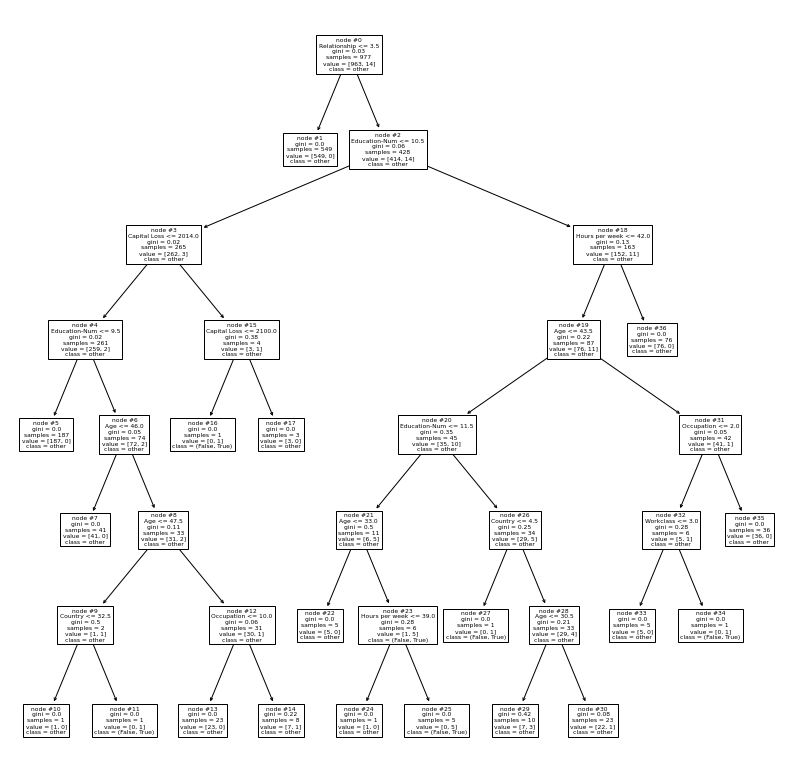

In [12]:
explain(max_depth=7)

This explanation is very similar to the last one. It has the same number of rules. Except for:
- rule 4 (11/10): discriminates on Hours per week instead of Country

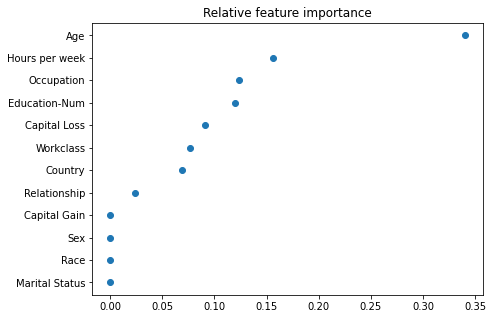

node #27: if (Age > 33.0) and (Age <= 43.5) and (Education-Num > 10.5) and (Education-Num <= 11.5) and (Relationship > 3.5) and (Hours per week > 39.0) and (Hours per week <= 42.0) then class (False, True) (covers 1.0 of 5 instances)
node #18: if (Education-Num <= 10.5) and (Relationship > 3.5) and (Capital Loss > 2014.0) and (Capital Loss <= 2100.0) then class (False, True) (covers 1.0 of 1 instances)
node #29: if (Age <= 43.5) and (Education-Num > 11.5) and (Relationship > 3.5) and (Hours per week <= 42.0) and (Country <= 4.5) then class (False, True) (covers 1.0 of 1 instances)
node #11: if (Age > 46.0) and (Age <= 47.5) and (Education-Num > 9.5) and (Education-Num <= 10.5) and (Occupation > 2.5) and (Relationship > 3.5) and (Capital Loss <= 2014.0) then class (False, True) (covers 1.0 of 1 instances)
node #40: if (Age > 43.5) and (Workclass > 3.0) and (Education-Num > 10.5) and (Occupation <= 2.0) and (Relationship > 3.5) and (Hours per week <= 42.0) then class (False, True) (cover

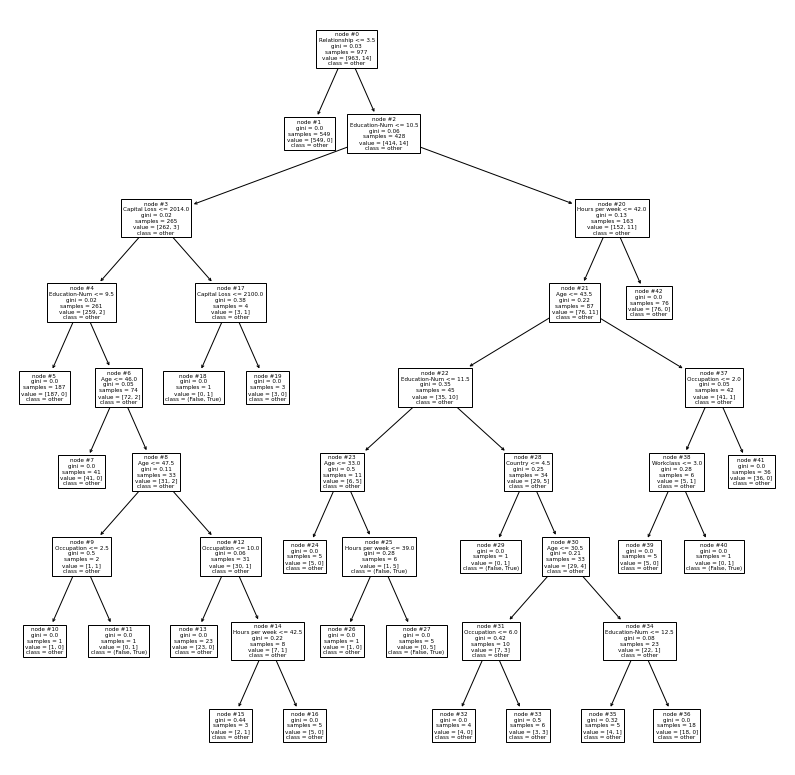

In [13]:
explain(max_depth=8)

This explanation adds 3 more rules, with the rest being equal to the previous rules. The first of them explains 4 instances, the other one instance each. Difference class' Precision is increased to 93%, Recall to 100%.

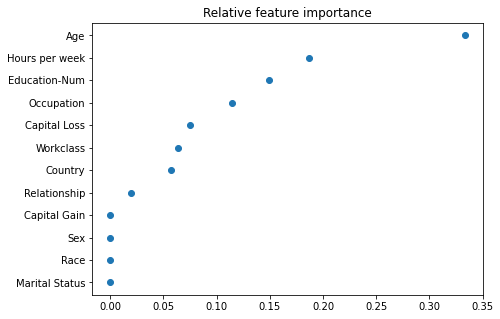

node #29: if (Age > 33.0) and (Age <= 43.5) and (Education-Num > 10.5) and (Education-Num <= 11.5) and (Relationship > 3.5) and (Hours per week > 39.0) and (Hours per week <= 42.0) then class (False, True) (covers 1.0 of 5 instances)
node #37: if (Age <= 30.5) and (Education-Num > 11.5) and (Occupation > 6.0) and (Relationship > 3.5) and (Hours per week > 39.0) and (Hours per week <= 42.0) and (Country > 4.5) then class (False, True) (covers 0.75 of 4 instances)
node #20: if (Education-Num <= 10.5) and (Relationship > 3.5) and (Capital Loss > 2014.0) and (Capital Loss <= 2100.0) then class (False, True) (covers 1.0 of 1 instances)
node #31: if (Age <= 43.5) and (Education-Num > 11.5) and (Relationship > 3.5) and (Hours per week <= 42.0) and (Country <= 4.5) then class (False, True) (covers 1.0 of 1 instances)
node #16: if (Age > 47.5) and (Age <= 52.5) and (Education-Num > 9.5) and (Education-Num <= 10.5) and (Occupation > 10.0) and (Relationship > 3.5) and (Capital Loss <= 2014.0) and

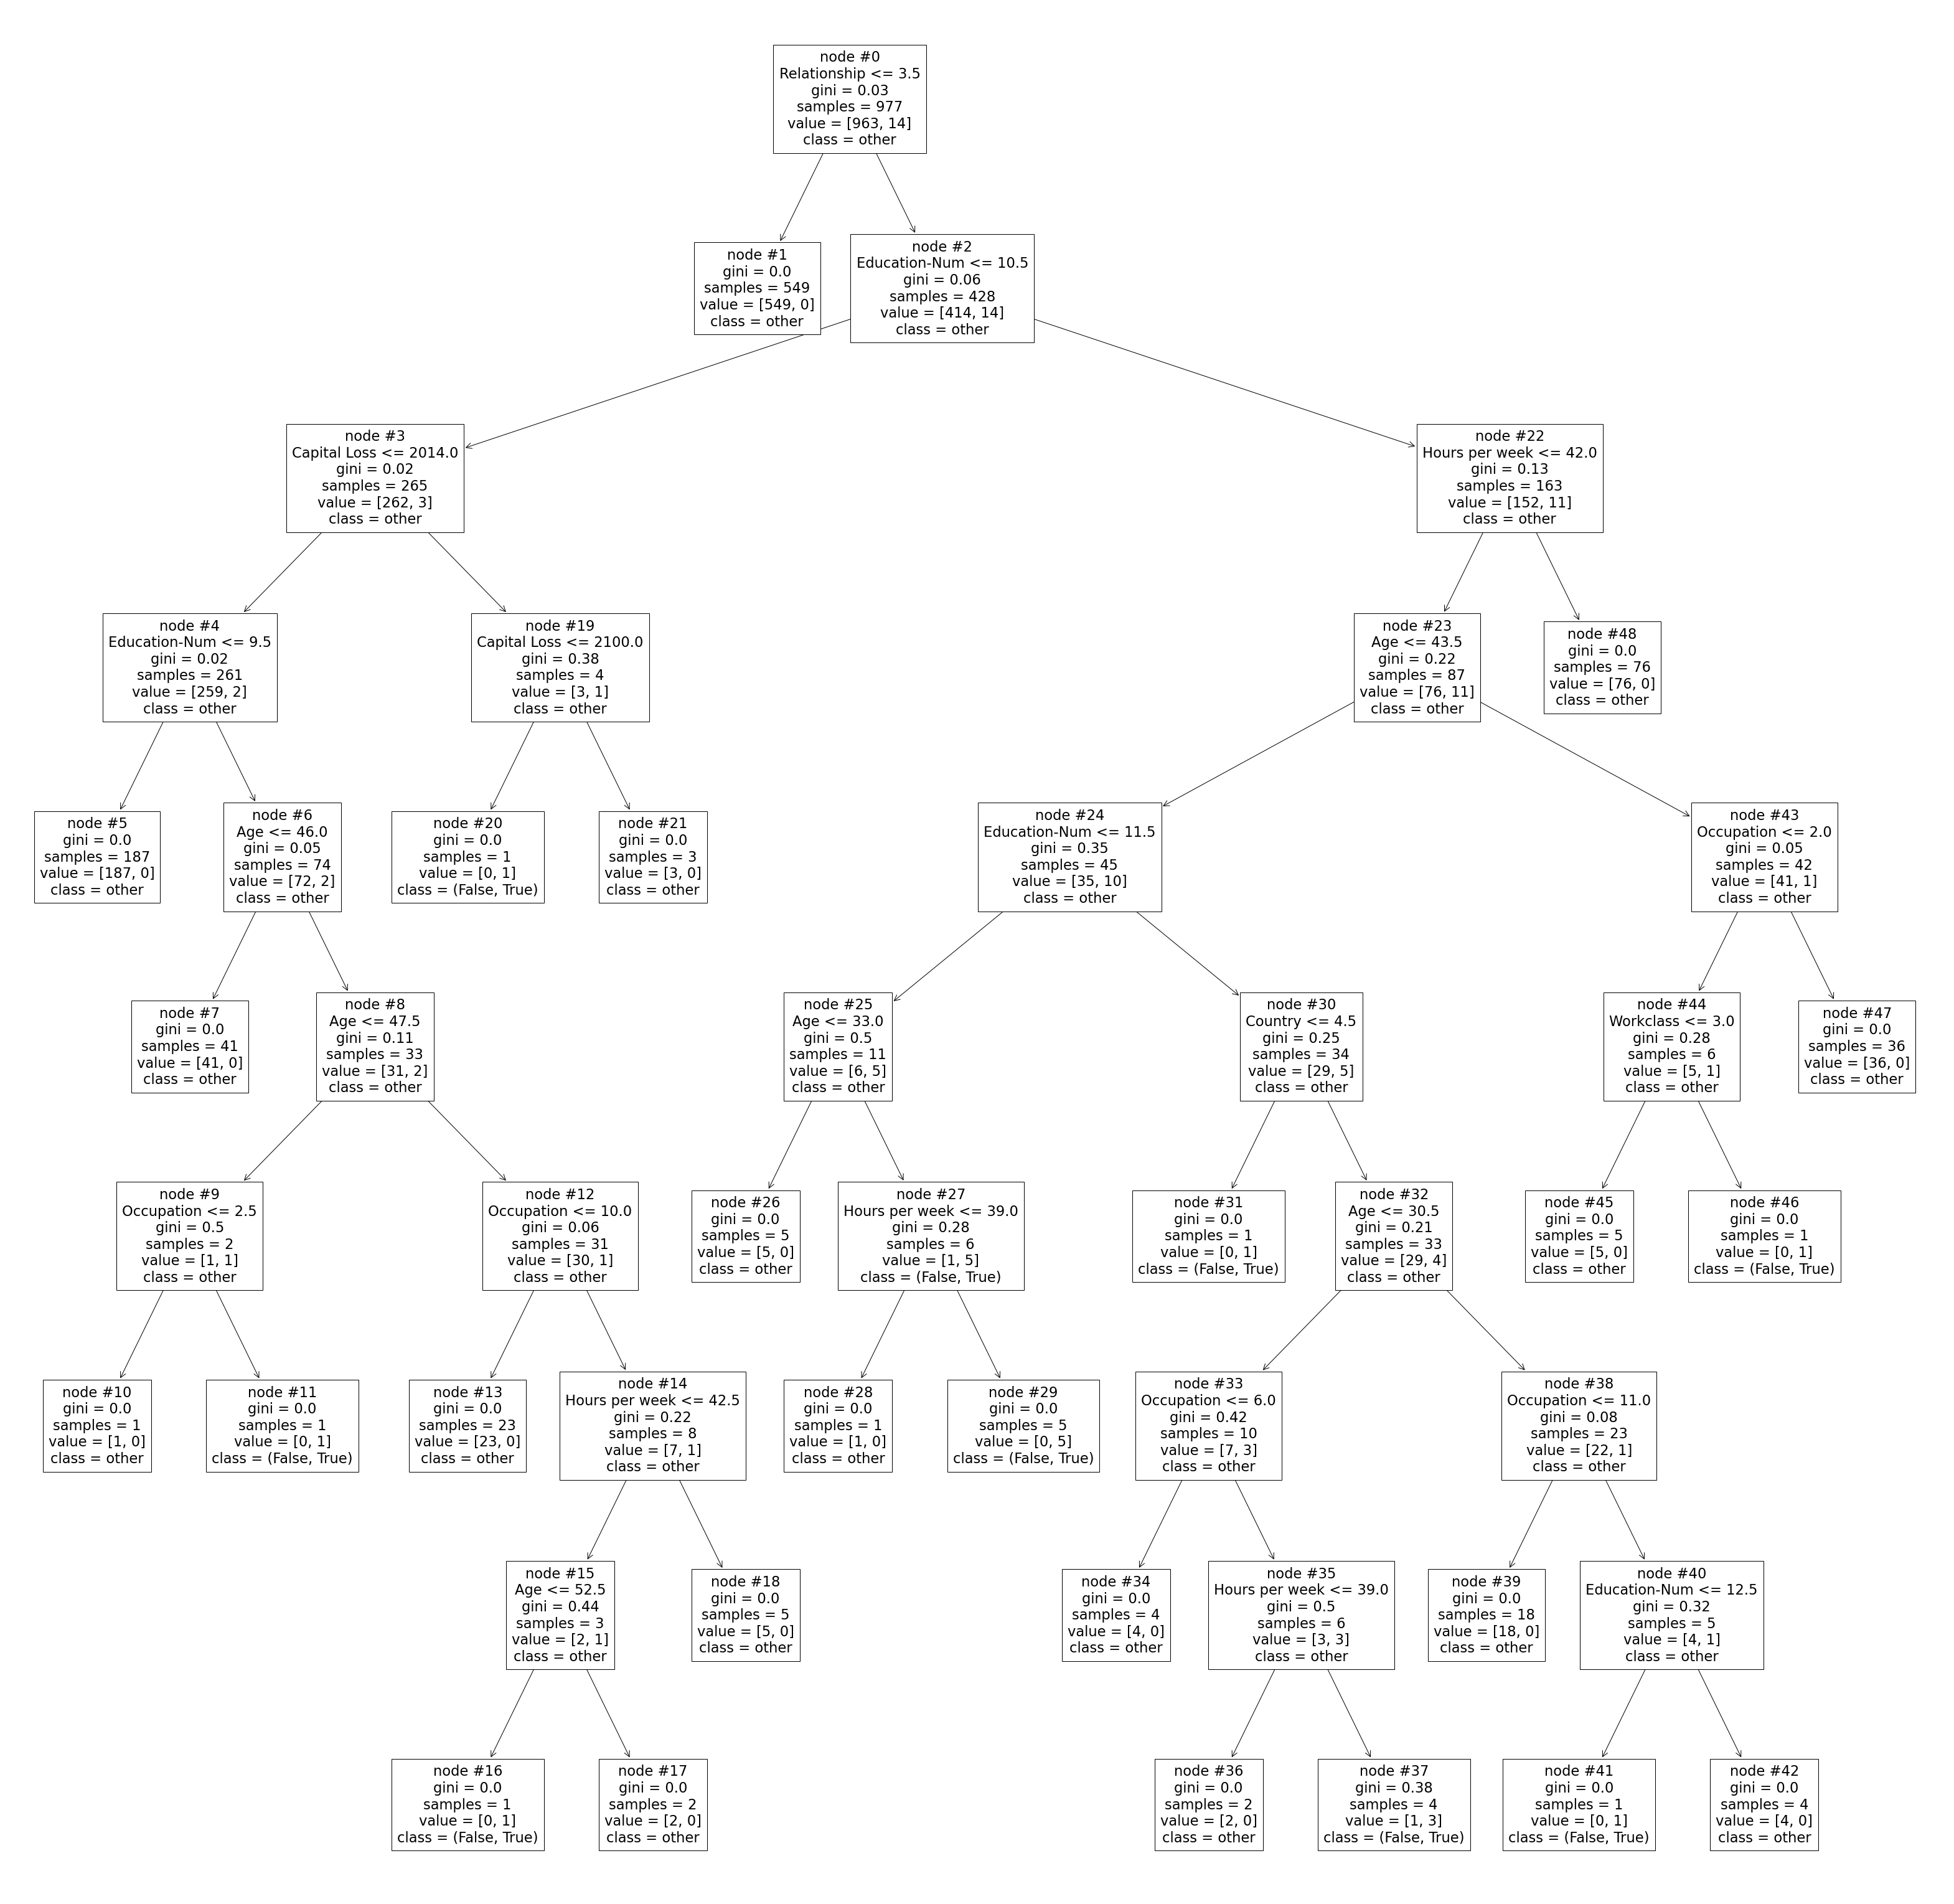

In [14]:
explain(max_depth=9, tree_fig_size=(56, 56))

This explanation includes the same number of rules, which are equal except for minor differences. Yet it now describes with 100% precision.
- rule 2 (node 37/37): Adds a lower bound to Age, and removes Occupation.
- rule 6 (node 11/11): Adds Country and removes Occupation.

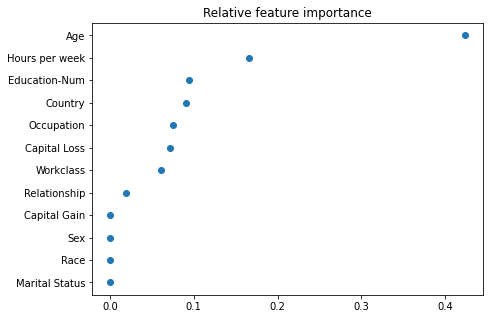

node #29: if (Age > 33.0) and (Age <= 43.5) and (Education-Num > 10.5) and (Education-Num <= 11.5) and (Relationship > 3.5) and (Hours per week > 39.0) and (Hours per week <= 42.0) then class (False, True) (covers 1.0 of 5 instances)
node #37: if (Age > 27.5) and (Age <= 30.5) and (Education-Num > 11.5) and (Relationship > 3.5) and (Hours per week > 39.0) and (Hours per week <= 42.0) and (Country > 4.5) then class (False, True) (covers 1.0 of 3 instances)
node #31: if (Age <= 43.5) and (Education-Num > 11.5) and (Relationship > 3.5) and (Hours per week <= 42.0) and (Country <= 4.5) then class (False, True) (covers 1.0 of 1 instances)
node #20: if (Education-Num <= 10.5) and (Relationship > 3.5) and (Capital Loss > 2014.0) and (Capital Loss <= 2100.0) then class (False, True) (covers 1.0 of 1 instances)
node #16: if (Age > 47.5) and (Age <= 52.5) and (Education-Num > 9.5) and (Education-Num <= 10.5) and (Occupation > 10.0) and (Relationship > 3.5) and (Capital Loss <= 2014.0) and (Hours

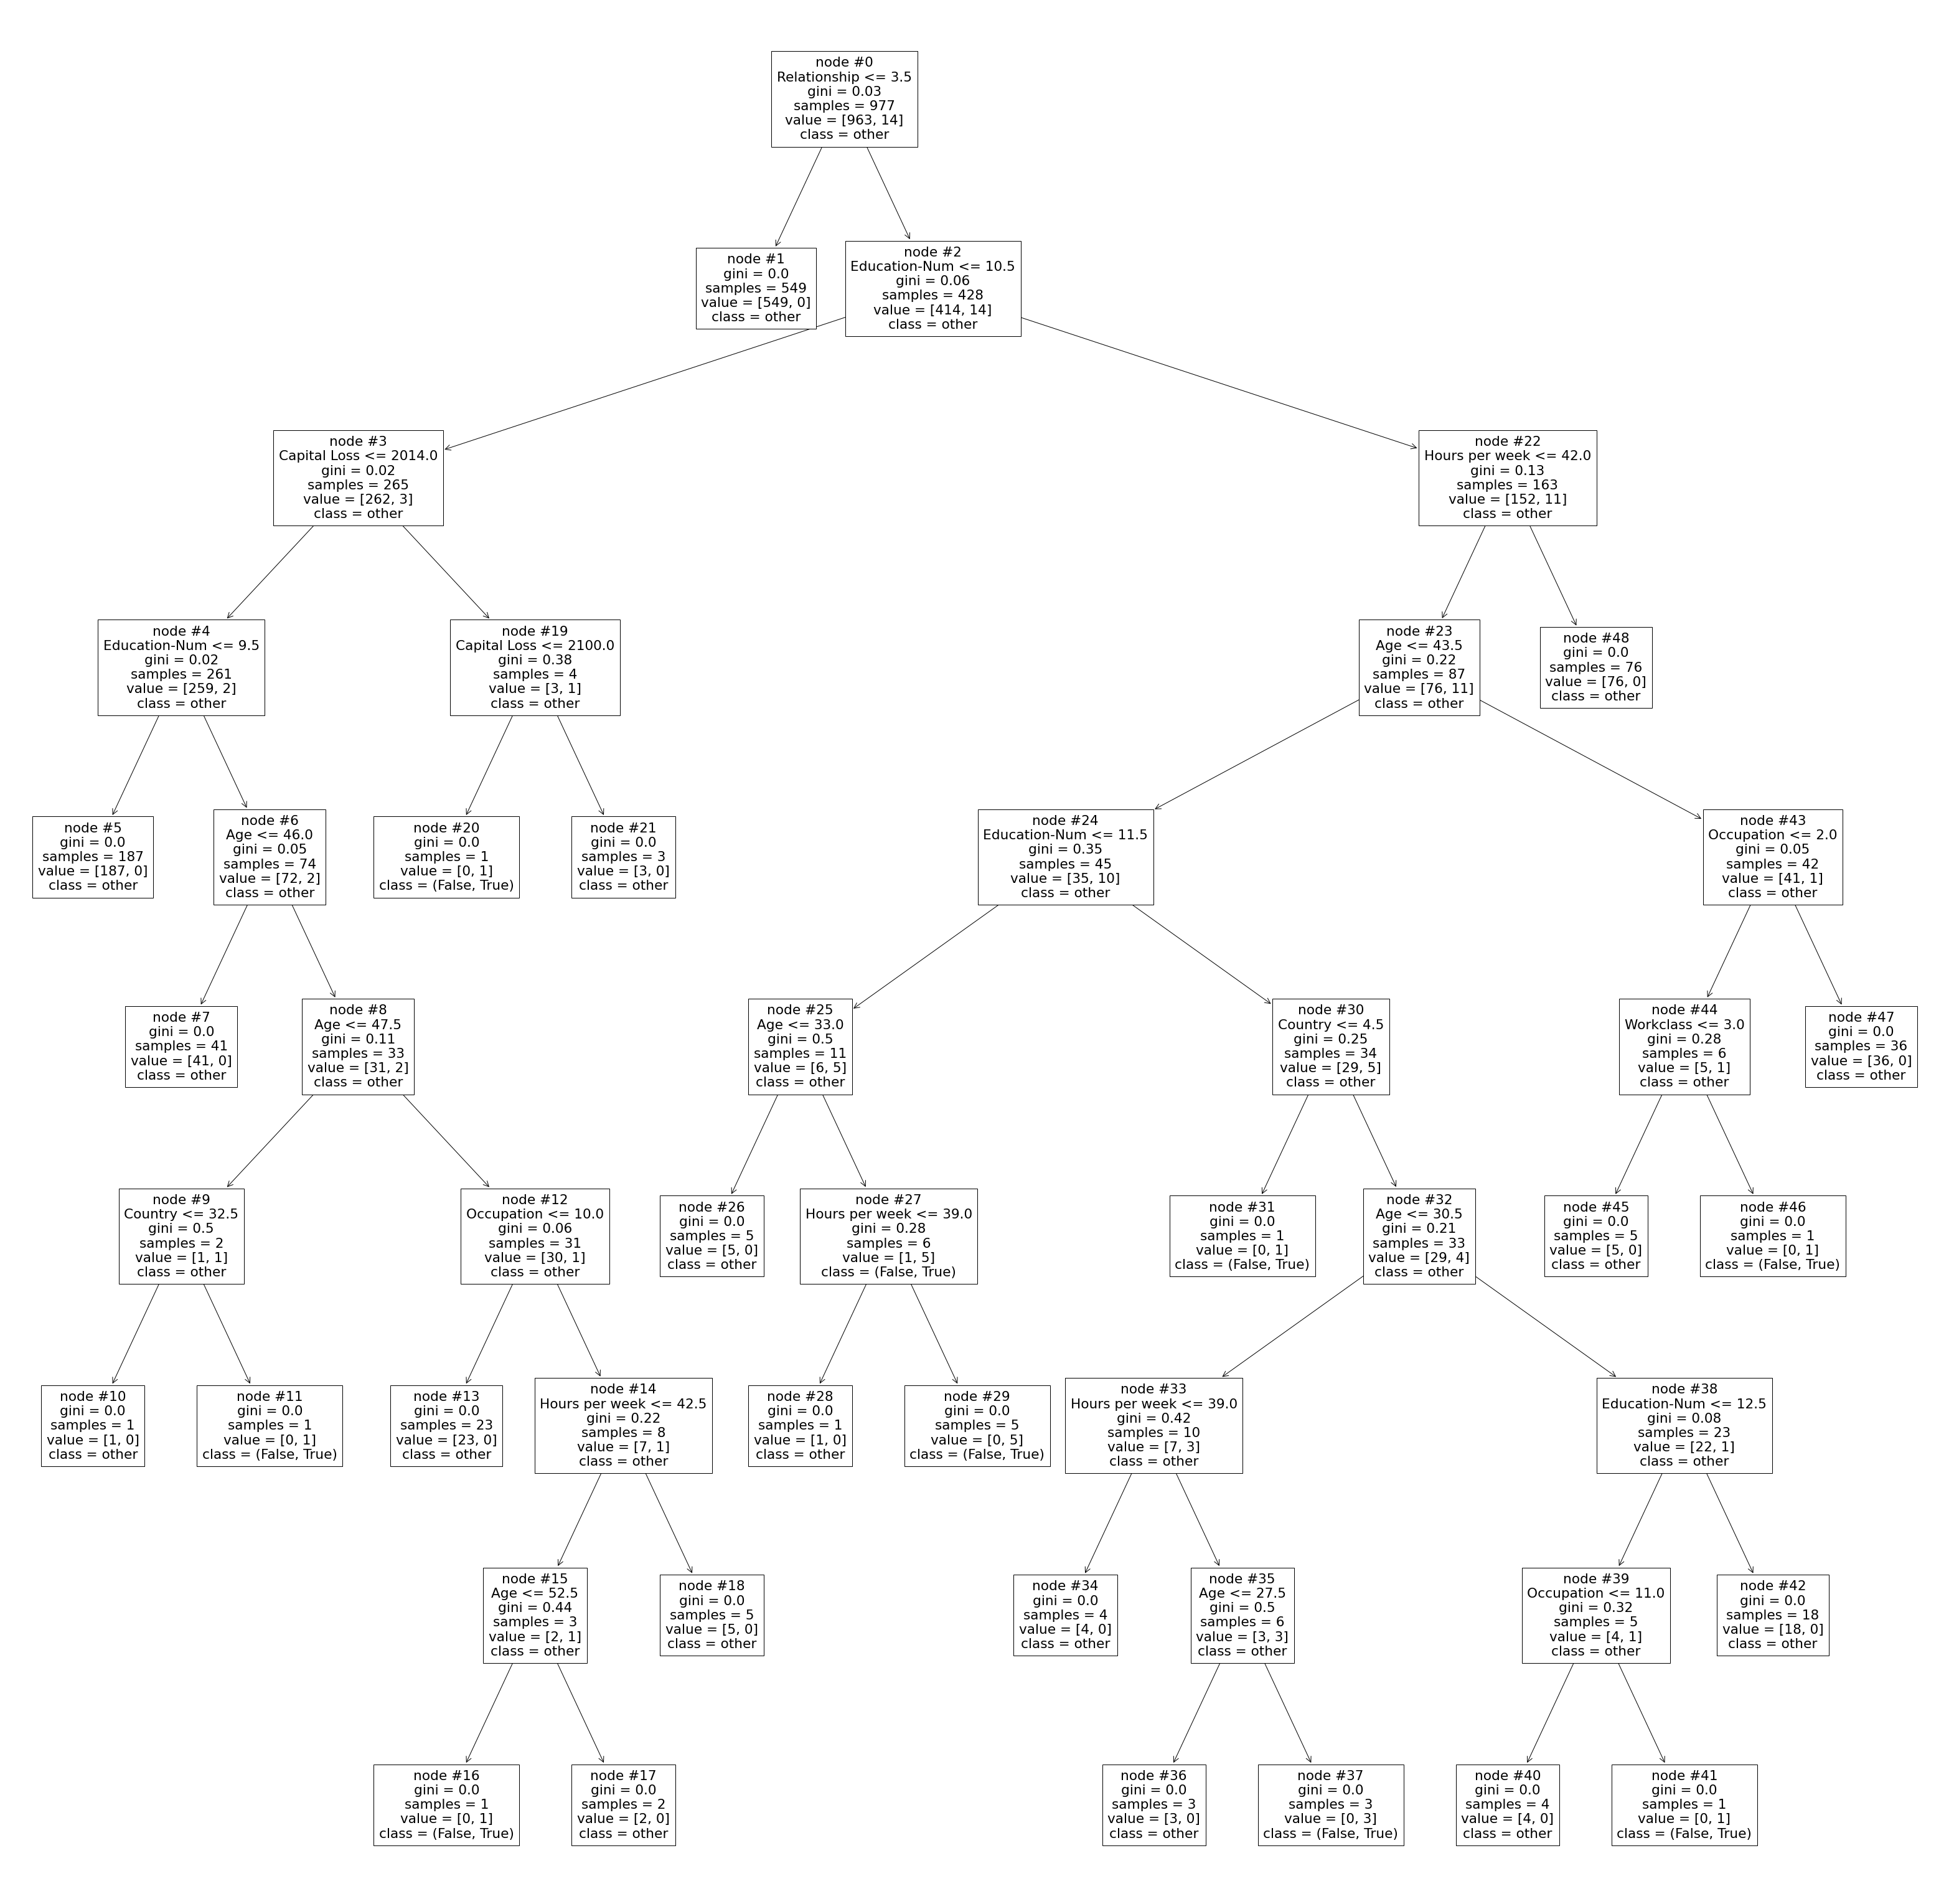

In [16]:
explain(max_depth=10, tree_fig_size=(56, 56))

In [17]:
tree.get_depth(), tree.get_n_leaves(), tree.tree_.node_count

(9, 25, 49)